In [ ]:
import os
from google.colab import files

# Create directories if not already created
os.makedirs("fruit_dataset/kiwi", exist_ok=True)
os.makedirs("fruit_dataset/watermelon", exist_ok=True)

# Upload kiwi images
print("📤 Upload 7 kiwi interior images")
uploaded_kiwi = files.upload()
for fname in uploaded_kiwi:
    os.rename(fname, f"fruit_dataset/kiwi/{fname}")

# Upload watermelon images
print("📤 Upload 7 watermelon interior images")
uploaded_wm = files.upload()
for fname in uploaded_wm:
    os.rename(fname, f"fruit_dataset/watermelon/{fname}")

print("✅ Images saved in 'fruit_dataset/kiwi/' and 'fruit_dataset/watermelon/'")


📤 Upload 7 kiwi interior images


Saving kiwi1.jpg to kiwi1.jpg
Saving kiwi2.jpg to kiwi2.jpg
Saving kiwi3.jpg to kiwi3.jpg
Saving kiwi4.jpg to kiwi4.jpg
Saving kiwi5.jpg to kiwi5.jpg
Saving kiwi6.jpg to kiwi6.jpg
Saving kiwi7.jpg to kiwi7.jpg
📤 Upload 7 watermelon interior images


Saving watermelon1.jpg to watermelon1.jpg
Saving watermelon2.jpg to watermelon2.jpg
Saving watermelon3.jpg to watermelon3.jpg
Saving watermelon4.jpg to watermelon4.jpg
Saving watermelon5.jpg to watermelon5.jpg
Saving watermelon6.jpg to watermelon6.jpg
Saving watermelon7.jpg to watermelon7.jpg
✅ Images saved in 'fruit_dataset/kiwi/' and 'fruit_dataset/watermelon/'



🍉 Displaying: WATERMELON


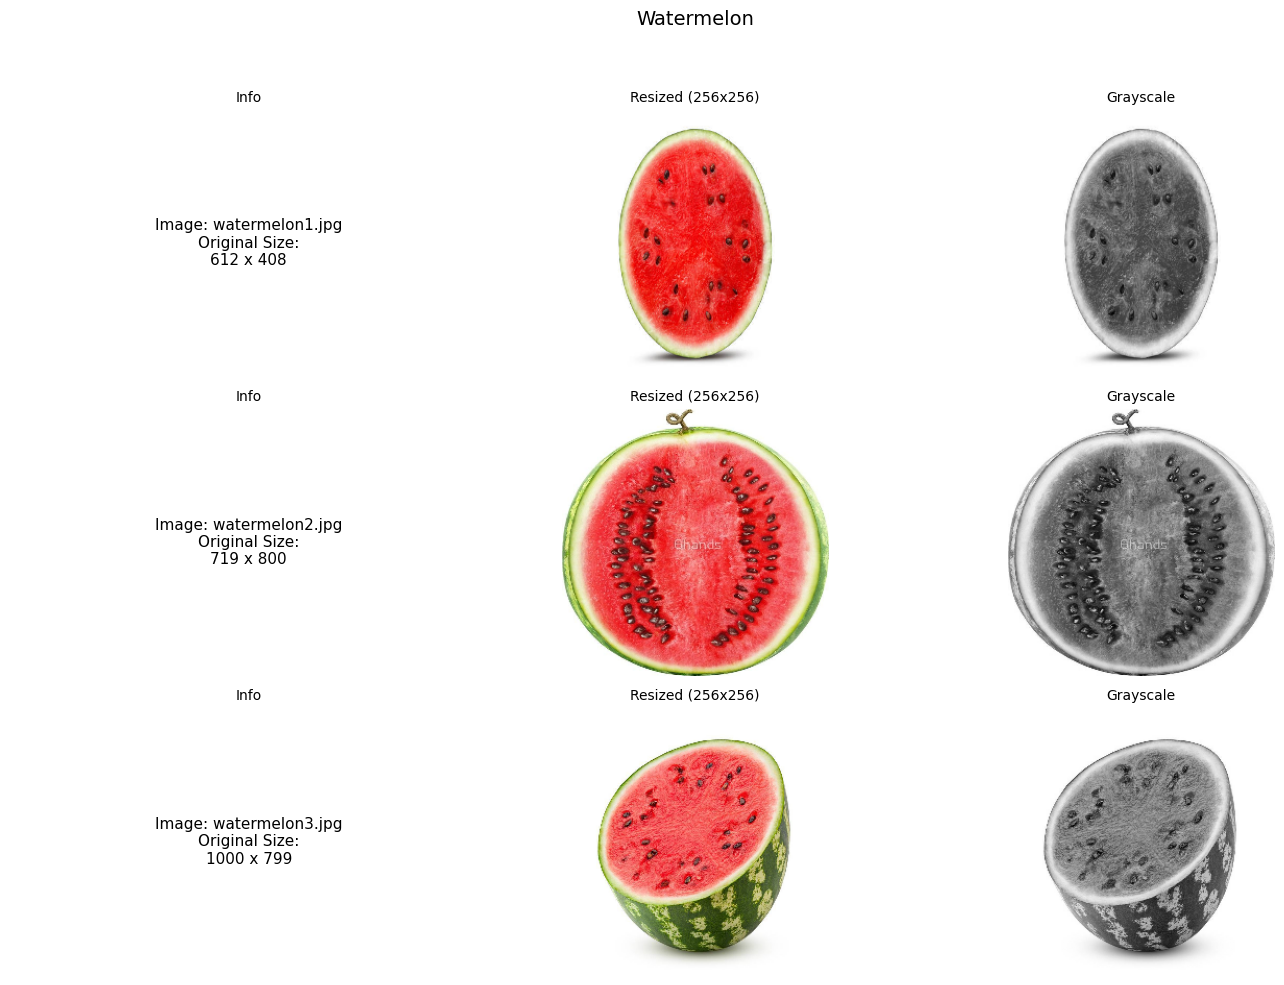

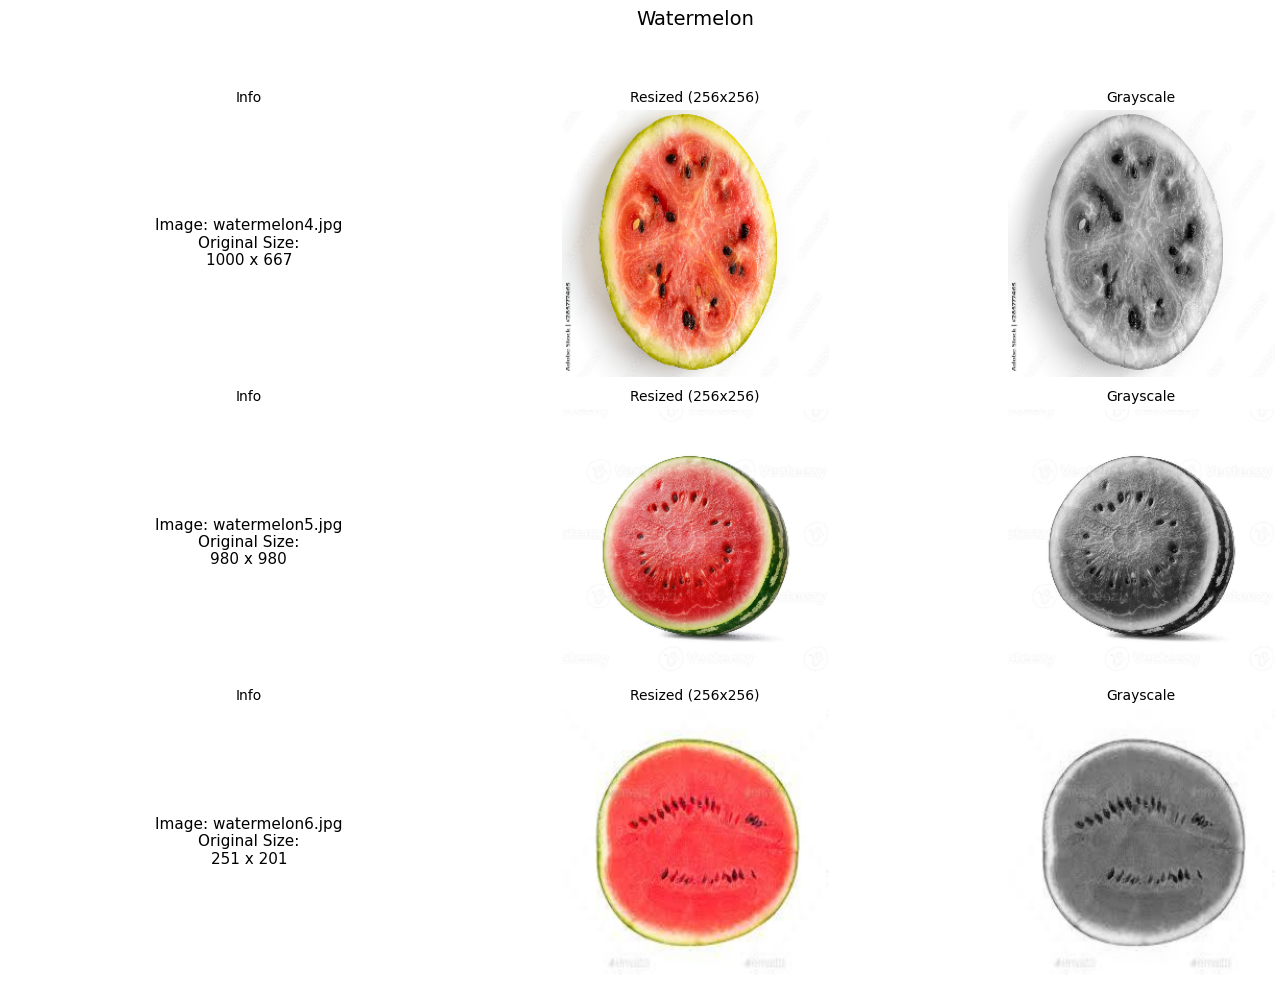

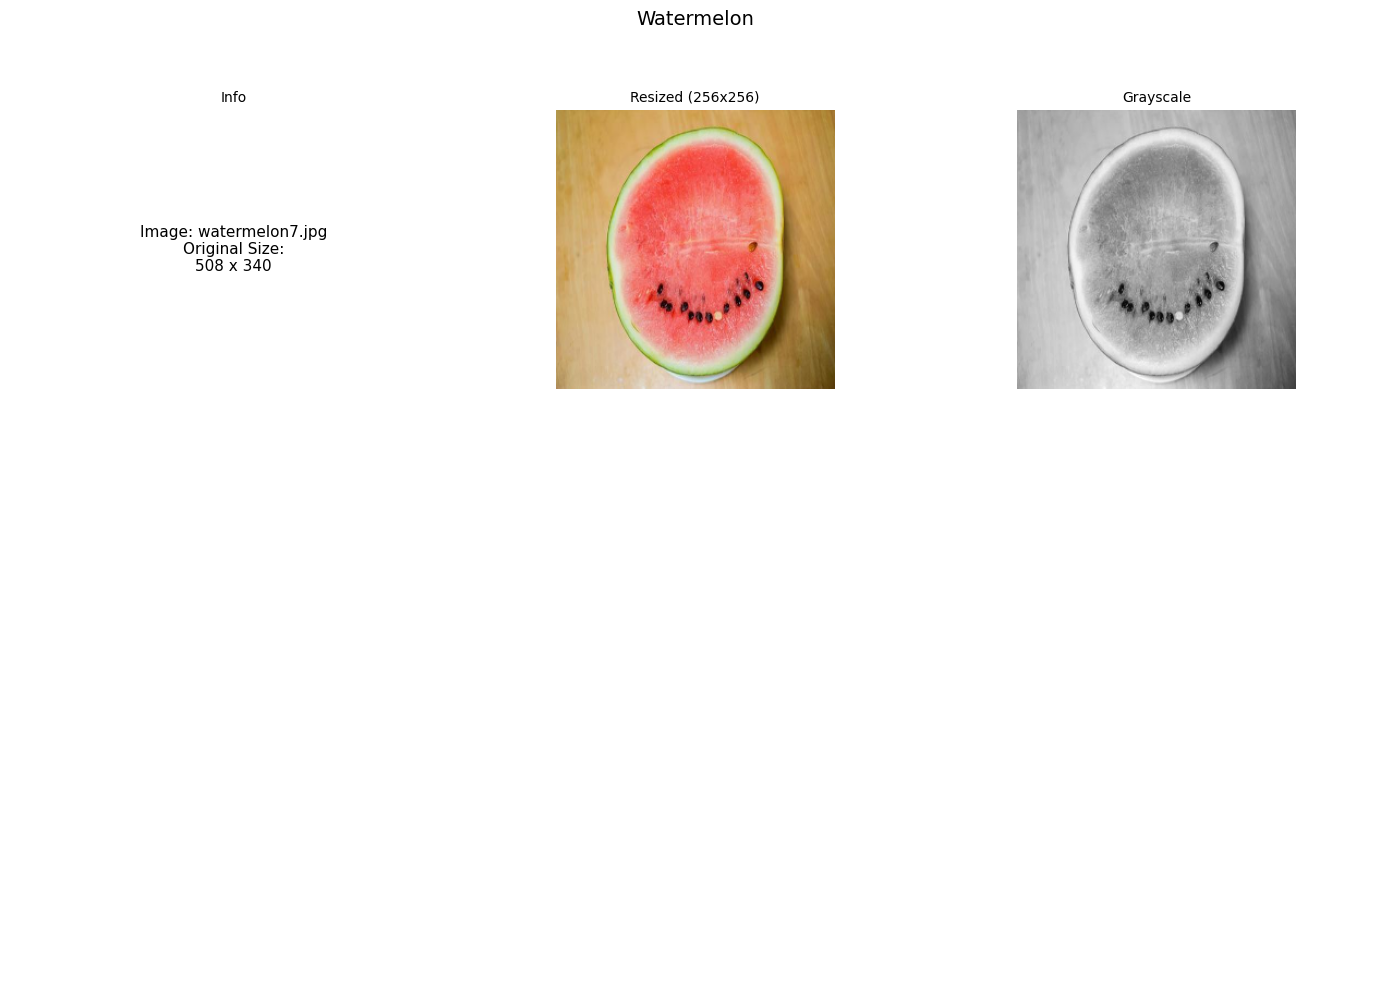


🍉 Displaying: KIWI


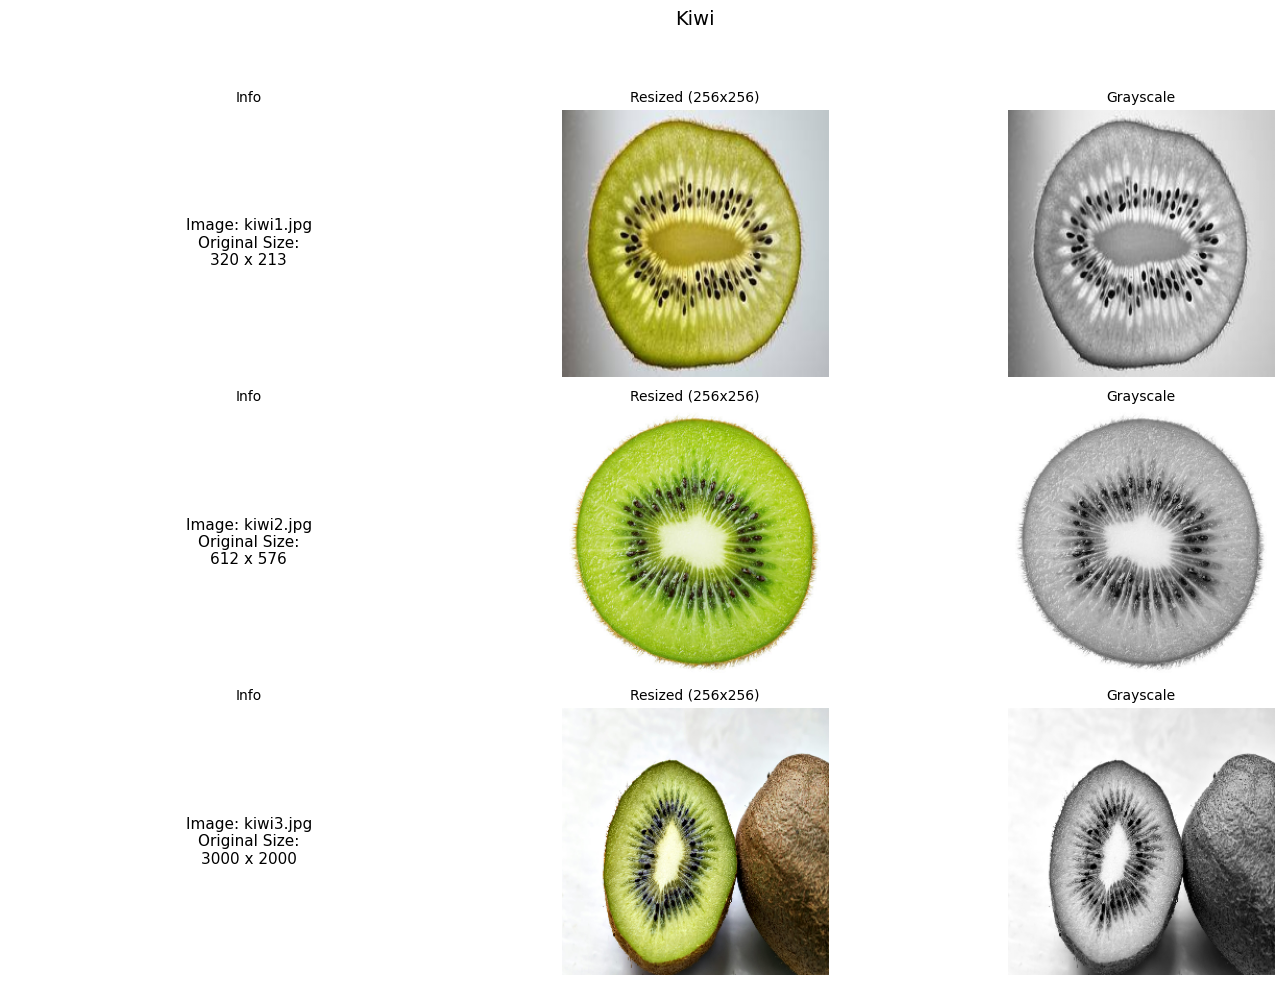

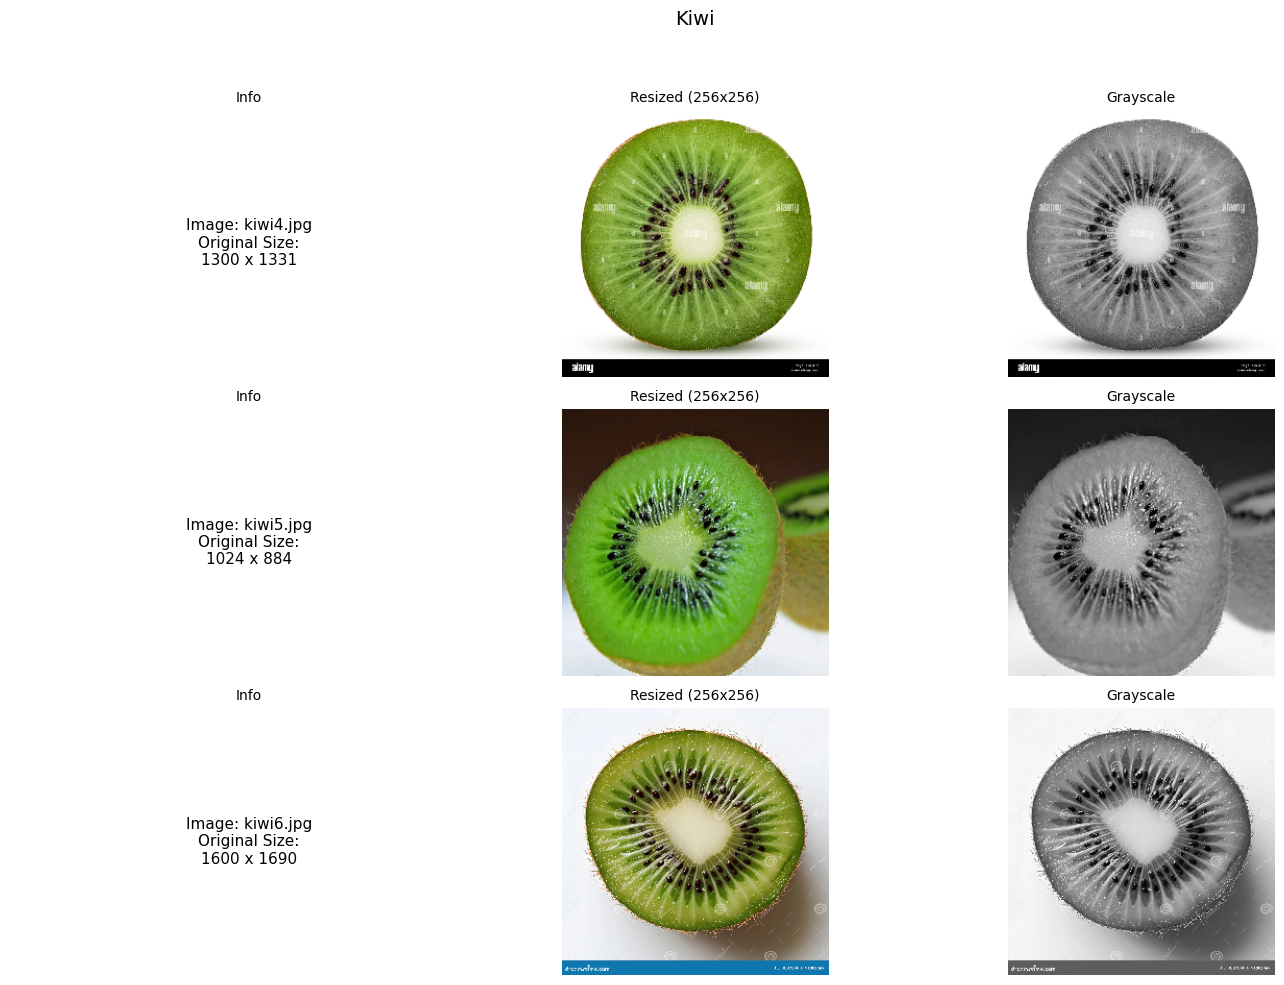

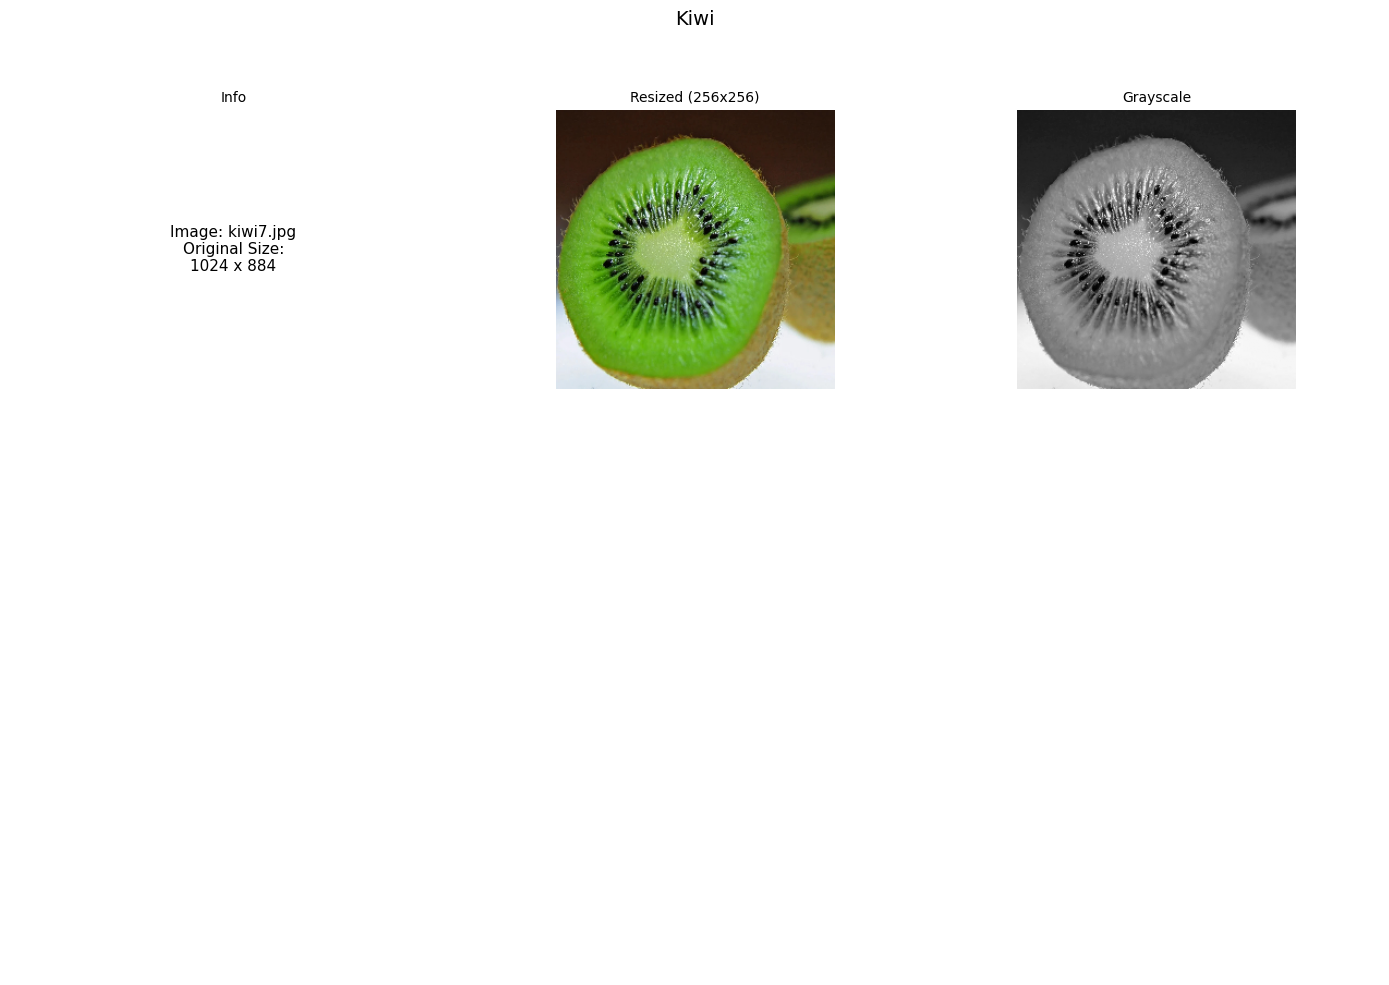

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import math

def show_preprocessing_3per_sheet(image_size=(256, 256)):
    fruit_classes = ['watermelon', 'kiwi']

    for fruit in fruit_classes:
        print(f"\n🍉 Displaying: {fruit.upper()}")
        folder = f'fruit_dataset/{fruit}'
        file_list = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        total_images = len(file_list)
        num_batches = math.ceil(total_images / 3)

        for batch in range(num_batches):
            fig, axs = plt.subplots(3, 3, figsize=(14, 10))  # 3 rows × 3 columns
            fig.suptitle(f"{fruit.capitalize()}", fontsize=14)

            for i in range(3):
                index = batch * 3 + i
                if index >= total_images:
                    for col in range(3):
                        axs[i, col].axis('off')
                    continue

                path = os.path.join(folder, file_list[index])
                img = cv2.imread(path)

                if img is None:
                    print(f"⚠️ Could not read {path}")
                    for col in range(3):
                        axs[i, col].axis('off')
                    continue

                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                h, w, _ = img_rgb.shape  # Get original size
                resized = cv2.resize(img_rgb, image_size)
                gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)

                # Column 0: Text Info
                axs[i, 0].text(0.5, 0.5,
                               f"Image: {file_list[index]}\nOriginal Size:\n{w} x {h}",
                               fontsize=11, ha='center', va='center')
                axs[i, 0].set_title("Info", fontsize=10)
                axs[i, 0].axis('off')

                # Column 1: Resized Image
                axs[i, 1].imshow(resized)
                axs[i, 1].set_title("Resized (256x256)", fontsize=10)
                axs[i, 1].axis('off')

                # Column 2: Grayscale Image
                axs[i, 2].imshow(gray, cmap='gray')
                axs[i, 2].set_title("Grayscale", fontsize=10)
                axs[i, 2].axis('off')

            plt.tight_layout()
            plt.subplots_adjust(top=0.88)
            plt.show()

# Run it
show_preprocessing_3per_sheet()


📂 Processing Kiwi images from: fruit_dataset/kiwi

📸 Kiwi Image: kiwi1.jpg
[[ 1466   397   181   112    91    44    16     3]
 [  397   560   348   182   115   100    43    11]
 [  181   348  1360   824   265   188    74    20]
 [  112   182   824  7146  1945   408   178    50]
 [   91   115   265  1945 25860  4109   496    99]
 [   44   100   188   408  4109 26182  3965   389]
 [   16    43    74   178   496  3965 35698  1868]
 [    3    11    20    50    99   389  1868  4580]]


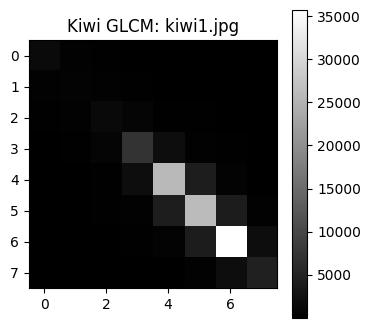


📸 Kiwi Image: kiwi2.jpg
[[  2652   1536    210     67     15      2      0      0]
 [  1536   6216   3080    542    182     28      0      0]
 [   210   3080  13006   5209    880    218     11      0]
 [    67    542   5209  26084   9532   1100     77      3]
 [    15    182    880   9532  66378  16937    861     31]
 [     2     28    218   1100  16937 172470  18821    390]
 [     0      0     11     77    861  18821  40762   3208]
 [     0      0      0      3     31    390   3208 250424]]


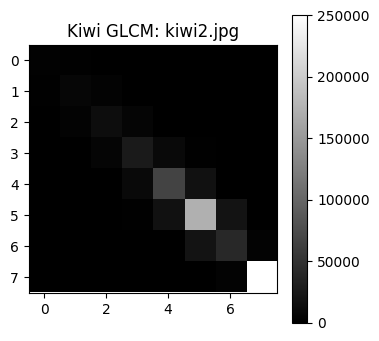


📸 Kiwi Image: kiwi3.jpg
[[ 405252   31107      92       8       0       0       0       0]
 [  31107 1206448   47055     221      26       3       0       0]
 [     92   47055  952328   64682     403      24       0       0]
 [      8     221   64682  910988   76311     415      18       0]
 [      0      26     403   76311  937722   69223     420       3]
 [      0       3      24     415   69223 1112102   44852     293]
 [      0       0       0      18     420   44852  921206   12526]
 [      0       0       0       0       3     293   12526 4854590]]


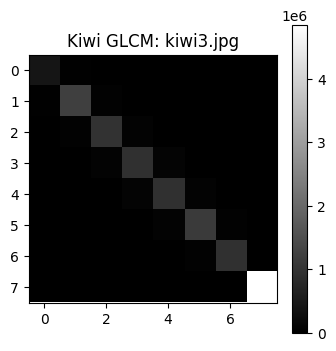


📸 Kiwi Image: kiwi4.jpg
[[ 257320    6157    1333     361     191     191     182     257]
 [   6157   24824   12714    1410     275      44      17     155]
 [   1333   12714  152338   46151    2004     337      61     204]
 [    361    1410   46151  450956   79995    2275     328     182]
 [    191     275    2004   79995  685016   52863    1703     325]
 [    191      44     337    2275   52863  232264   10627     771]
 [    182      17      61     328    1703   10627  119022    5604]
 [    257     155     204     182     325     771    5604 1082764]]


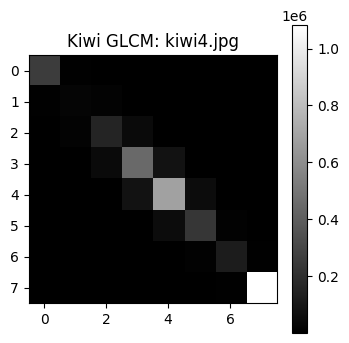


📸 Kiwi Image: kiwi5.jpg
[[182402  12033    430     96     35     11      5      0]
 [ 12033 218550   7337    660    185     50     21      4]
 [   430   7337  77454  13211    808    247    104     23]
 [    96    660  13211 344582  31024   1323    438    126]
 [    35    185    808  31024 552830  15490   1593    543]
 [    11     50    247   1323  15490  79338   5390   1491]
 [     5     21    104    438   1593   5390  15272   4053]
 [     0      4     23    126    543   1491   4053 144774]]


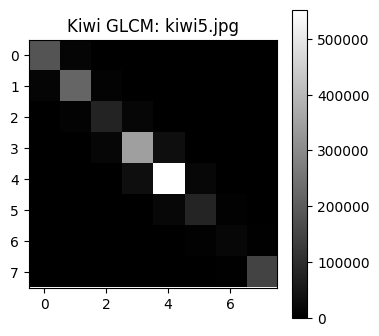


📸 Kiwi Image: kiwi6.jpg
[[  94696   10439    1454     398     185      68      17       3]
 [  10439   92618   25411    3040    1262     597     205      38]
 [   1454   25411  882916   63820    7673    2840    1335     751]
 [    398    3040   63820  630866   64735    8413    3409    1849]
 [    185    1262    7673   64735  734664   47732    7646    4071]
 [     68     597    2840    8413   47732  356756   29353    7558]
 [     17     205    1335    3409    7646   29353  403826   18945]
 [      3      38     751    1849    4071    7558   18945 1581784]]


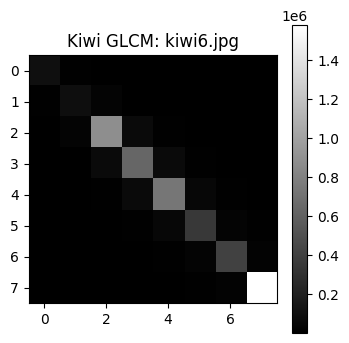


📸 Kiwi Image: kiwi7.jpg
[[182402  12033    430     96     35     11      5      0]
 [ 12033 218550   7337    660    185     50     21      4]
 [   430   7337  77454  13211    808    247    104     23]
 [    96    660  13211 344582  31024   1323    438    126]
 [    35    185    808  31024 552830  15490   1593    543]
 [    11     50    247   1323  15490  79338   5390   1491]
 [     5     21    104    438   1593   5390  15272   4053]
 [     0      4     23    126    543   1491   4053 144774]]


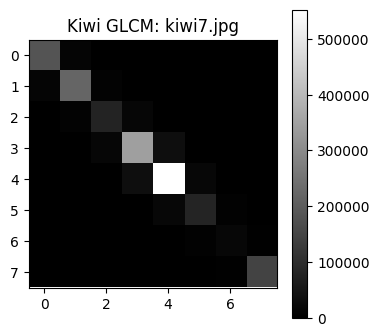


📂 Processing Watermelon images from: fruit_dataset/watermelon

📸 Watermelon Image: watermelon1.jpg
[[   534    418     52      6      0      0      0      0]
 [   418   3034   2061     85      6      0      0      0]
 [    52   2061  46574  10945    228      6      0      0]
 [     6     85  10945  44010   6118    150     50     58]
 [     0      6    228   6118  16100   1957    214    159]
 [     0      0      6    150   1957   9232   1625    218]
 [     0      0      0     50    214   1625  19754   1771]
 [     0      0      0     58    159    218   1771 307084]]


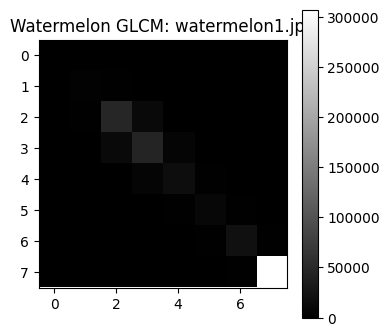


📸 Watermelon Image: watermelon2.jpg
[[  1126   2459    256     67     18      8      1      1]
 [  2459  42824   9787    750    151     61     18      4]
 [   256   9787  73934  20412   1303    227     53     14]
 [    67    750  20412 162184  40091   1362    250     42]
 [    18    151   1303  40091 174686  18543    811    161]
 [     8     61    227   1362  18543  61996   7474    631]
 [     1     18     53    250    811   7474  71254   6562]
 [     1      4     14     42    161    631   6562 337762]]


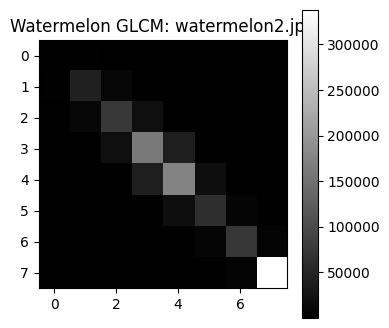


📸 Watermelon Image: watermelon3.jpg
[[  1388    917    226     36      5      0      0      0]
 [   917  29768   8772    804     89      5      1      0]
 [   226   8772  67376  17004   2259    164     21      8]
 [    36    804  17004  83630  34395   1844    170     77]
 [     5     89   2259  34395 166698  26260    622    136]
 [     0      5    164   1844  26260  88830   7906    365]
 [     0      1     21    170    622   7906  77804   3708]
 [     0      0      8     77    136    365   3708 869320]]


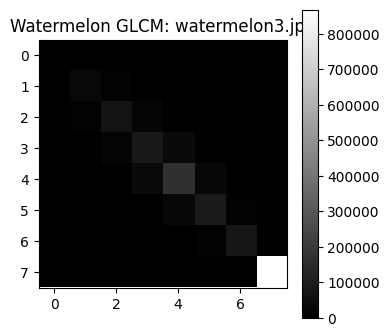


📸 Watermelon Image: watermelon4.jpg
[[  7016   1466    226     50      0      0      0      0]
 [  1466   9610   3322    463     49      4      5      9]
 [   226   3322  20612   7497    756    109    118    122]
 [    50    463   7497  68632  21275    677     74     76]
 [     0     49    756  21275 142448  23090    465     75]
 [     0      4    109    677  23090 110480  12869    213]
 [     0      5    118     74    465  12869 216834   8237]
 [     0      9    122     76     75    213   8237 594540]]


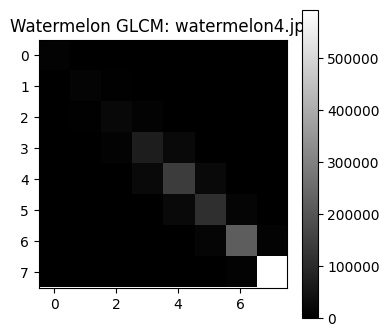


📸 Watermelon Image: watermelon5.jpg
[[    744     989      71      20       4       2       0       0]
 [    989   40392   10357     879     204      31       6       0]
 [     71   10357   94836   21744    3404     361      31       2]
 [     20     879   21744   92460   31441    3156     266      76]
 [      4     204    3404   31441  104794   24814     677     322]
 [      2      31     361    3156   24814   86474    6986     448]
 [      0       6      31     266     677    6986   80178    2166]
 [      0       0       2      76     322     448    2166 1202048]]


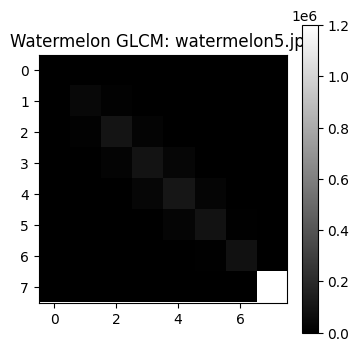


📸 Watermelon Image: watermelon6.jpg
[[   30    51    35    10     4     0     0     0]
 [   51   202   141    73    28     1     0     0]
 [   35   141   390   288   132     9     1     2]
 [   10    73   288 13858  3762    94    42    45]
 [    4    28   132  3762 14600   619   124    67]
 [    0     1     9    94   619  1880   611    80]
 [    0     0     1    42   124   611  2946   626]
 [    0     0     2    45    67    80   626 52904]]


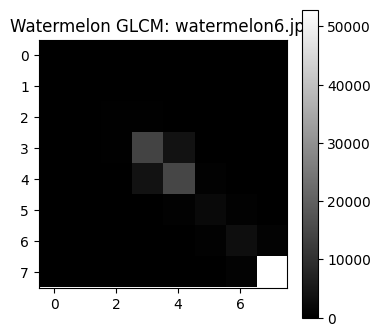


📸 Watermelon Image: watermelon7.jpg
[[   974    275    100     25      2      0      0      0]
 [   275   2444    496     98      6      1      0      0]
 [   100    496   7710   1161    120      6      0      0]
 [    25     98   1161  28584   4666    157      2      0]
 [     2      6    120   4666 101876   7865     64      0]
 [     0      1      6    157   7865 125688   2956      0]
 [     0      0      0      2     64   2956  40704    150]
 [     0      0      0      0      0      0    150    480]]


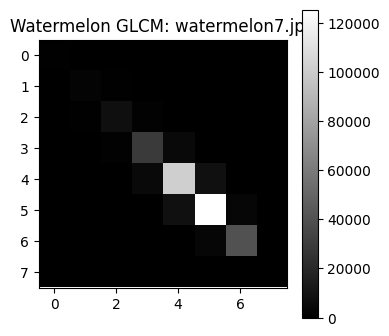

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix
import os

# --- Function to process and display GLCM for all images in folder ---
def process_images_from_folder(folder_path, label, levels=8):
    print(f"\n📂 Processing {label} images from: {folder_path}")

    # Filter supported image files
    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    for file_name in image_files:
        full_path = os.path.join(folder_path, file_name)

        # Read image in grayscale
        image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"⚠️ Error loading image: {file_name}")
            continue

        # Reduce to N gray levels (e.g., 8)
        image_reduced = (image / (256 / levels)).astype(np.uint8)

        # Compute GLCM
        glcm = graycomatrix(image_reduced, distances=[1], angles=[0], levels=levels, symmetric=True, normed=False)
        glcm_matrix = glcm[:, :, 0, 0]

        print(f"\n📸 {label} Image: {file_name}")
        print(glcm_matrix)

        # Show GLCM heatmap
        plt.figure(figsize=(4, 4))
        plt.imshow(glcm_matrix, cmap='gray')
        plt.title(f"{label} GLCM: {file_name}")
        plt.colorbar()
        plt.show()

# --- Process 7 KIWI Images ---
process_images_from_folder("fruit_dataset/kiwi", label="Kiwi")

# --- Process 7 WATERMELON Images ---
process_images_from_folder("fruit_dataset/watermelon", label="Watermelon")


In [ ]:
# Install required packages if needed
!pip install scikit-image --quiet

# --- Imports ---
import cv2
import numpy as np
import pandas as pd
import os
from skimage.feature import graycomatrix
from IPython.display import display
from google.colab import files

# --- GLCM Feature Extraction Function ---
def extract_glcm_features(image, levels=8, distance=1):
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135°
    angle_labels = ['0', '45', '90', '135']

    image = (image / (256 / levels)).astype(np.uint8)
    glcm = graycomatrix(image, distances=[distance], angles=angles, levels=levels, symmetric=True, normed=True)
    all_features = {}

    for idx, angle_label in enumerate(angle_labels):
        P = glcm[:, :, 0, idx]
        i, j = np.indices(P.shape)

        mean_i = np.sum(i * P)
        mean_j = np.sum(j * P)
        std_i = np.sqrt(np.sum(((i - mean_i) ** 2) * P))
        std_j = np.sqrt(np.sum(((j - mean_j) ** 2) * P))

        entropy = -np.sum(P * np.log2(P + 1e-10))
        px = np.sum(P, axis=1)
        py = np.sum(P, axis=0)
        HX = -np.sum(px * np.log2(px + 1e-10))
        HY = -np.sum(py * np.log2(py + 1e-10))
        HXY1 = -np.sum(P * np.log2(np.outer(px, py) + 1e-10))
        pxpy = np.array([np.sum(P[i + j == k]) for k in range(2 * levels)])
        pxmy = np.array([np.sum(P[np.abs(i - j) == k]) for k in range(levels)])
        mu = (mean_i + mean_j) / 2

        all_features[f'contrast_{angle_label}'] = np.sum(P * (i - j) ** 2)
        all_features[f'dissimilarity_{angle_label}'] = np.sum(P * np.abs(i - j))
        all_features[f'homogeneity_{angle_label}'] = np.sum(P / (1.0 + (i - j) ** 2))
        ASM = np.sum(P ** 2)
        all_features[f'ASM_{angle_label}'] = ASM
        all_features[f'energy_{angle_label}'] = np.sqrt(ASM)
        all_features[f'entropy_{angle_label}'] = entropy
        all_features[f'correlation_{angle_label}'] = (np.sum(i * j * P) - mean_i * mean_j) / (std_i * std_j + 1e-10)
        all_features[f'sum_entropy_{angle_label}'] = -np.sum(pxpy * np.log2(pxpy + 1e-10))
        all_features[f'difference_entropy_{angle_label}'] = -np.sum(pxmy * np.log2(pxmy + 1e-10))
        all_features[f'cluster_shade_{angle_label}'] = np.sum(((i + j - mu) ** 3) * P)
        all_features[f'IMC1_{angle_label}'] = (entropy - HXY1) / max(HX, HY + 1e-10)

    return all_features

# --- Process Images from Folder ---
def process_images_from_folder(folder_path, label):
    feature_list = []
    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])[:7]

    print(f"\n--- Processing {label} Images ---")
    for file_name in image_files:
        full_path = os.path.join(folder_path, file_name)
        image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"⚠️ Could not read {file_name}")
            continue

        features = extract_glcm_features(image)
        features['filename'] = file_name
        features['label'] = label
        feature_list.append(features)

        print(f"\n📁 {file_name} features:")
        for k, v in features.items():
            if k not in ['filename', 'label']:
                print(f"{k}: {v:.4f}")

    return feature_list

# --- Set Folder Paths (Upload your folder in Colab first) ---
kiwi_path = "fruit_dataset/kiwi"
watermelon_path = "fruit_dataset/watermelon"

# --- Process and Combine ---
kiwi_features = process_images_from_folder(kiwi_path, label='kiwi')
watermelon_features = process_images_from_folder(watermelon_path, label='watermelon')

# --- Create, Save and Download DataFrame ---
df = pd.DataFrame(kiwi_features + watermelon_features)
print("\n🧾 Final Feature Table:")
display(df)

df.to_csv("glcm_features_kiwi_vs_watermelon.csv", index=False)
print("\n✅ CSV saved as glcm_features_kiwi_vs_watermelon.csv")

# --- Trigger Download in Colab ---
files.download("glcm_features_kiwi_vs_watermelon.csv")



--- Processing kiwi Images ---

📁 kiwi1.jpg features:
contrast_0: 0.5328
dissimilarity_0: 0.3142
homogeneity_0: 0.8629
ASM_0: 0.1510
energy_0: 0.3886
entropy_0: 3.5274
correlation_0: 0.8590
sum_entropy_0: 3.0234
difference_entropy_0: 1.0354
cluster_shade_0: 193.6106
IMC1_0: -0.4973
contrast_45: 0.7514
dissimilarity_45: 0.3909
homogeneity_45: 0.8362
ASM_45: 0.1399
energy_45: 0.3740
entropy_45: 3.6794
correlation_45: 0.8011
sum_entropy_45: 3.0634
difference_entropy_45: 1.1777
cluster_shade_45: 191.4368
IMC1_45: -0.4326
contrast_90: 0.4673
dissimilarity_90: 0.2878
homogeneity_90: 0.8726
ASM_90: 0.1565
energy_90: 0.3956
entropy_90: 3.4591
correlation_90: 0.8763
sum_entropy_90: 3.0096
difference_entropy_90: 0.9792
cluster_shade_90: 193.9993
IMC1_90: -0.5270
contrast_135: 0.7526
dissimilarity_135: 0.3898
homogeneity_135: 0.8366
ASM_135: 0.1400
energy_135: 0.3741
entropy_135: 3.6756
correlation_135: 0.8008
sum_entropy_135: 3.0640
difference_entropy_135: 1.1748
cluster_shade_135: 191.6488
IMC

contrast_0  dissimilarity_0  homogeneity_0     ASM_0  energy_0  entropy_0  \
0     0.532798         0.314245       0.862891  0.150985  0.388568   3.527422   
1     0.228428         0.193933       0.906458  0.203841  0.451487   3.083630   
2     0.059002         0.058302       0.970919  0.207976  0.456044   2.942097   
3     0.178952         0.142151       0.932016  0.169478  0.411677   3.188746   
4     0.148262         0.118611       0.943572  0.165727  0.407096   3.196307   
5     0.222985         0.144054       0.935462  0.155866  0.394799   3.310299   
6     0.148262         0.118611       0.943572  0.165727  0.407096   3.196307   
7     0.126978         0.111124       0.945990  0.400251  0.632654   2.278226   
8     0.239375         0.207268       0.899490  0.145689  0.381692   3.435750   
9     0.163806         0.142150       0.931066  0.319609  0.565339   2.668955   
10    0.148328         0.128927       0.937334  0.248226  0.498223   2.817212   
11    0.152296         0.124976       0.940219  0.405630  0.636891   2.374245   
12    0.209353         0.156338       0.926971  0.321515  0.567023   2.462055   
13    0.116742         0.108922       0.946318  0.243185  0.493138   2.605600   

    correlation_0  sum_entropy_0  difference_entropy_0  cluster_shade_0  ...  \
0        0.858993       3.023365              1.035407       193.610569  ...   
1        0.954156       2.818888              0.753603       287.634531  ...   
2        0.994642       2.880273              0.322272       363.709936  ...   
3        0.980662       2.999531              0.610498       306.913098  ...   
4        0.979126       3.025011              0.544339       170.616105  ...   
5        0.974015       3.065005              0.618158       310.439173  ...   
6        0.979126       3.025011              0.544339       170.616105  ...   
7        0.984323       2.138910              0.517475       384.362520  ...   
8        0.968460       3.160218              0.778998       299.048446  ...   
9        0.976080       2.477416              0.614898       352.628434  ...   
10       0.971231       2.653853              0.571427       318.139950  ...   
11       0.978165       2.197079              0.565698       368.650142  ...   
12       0.965629       2.242440              0.658345       343.788227  ...   
13       0.945807       2.472627              0.508417       137.274321  ...   

     ASM_135  energy_135  entropy_135  correlation_135  sum_entropy_135  \
0   0.139982    0.374141     3.675588         0.800764         3.064049   
1   0.196241    0.442991     3.185995         0.942531         2.858947   
2   0.203400    0.450999     3.059526         0.991692         2.959366   
3   0.161152    0.401438     3.320541         0.969504         3.059035   
4   0.156851    0.396045     3.328960         0.970119         3.094834   
5   0.152482    0.390490     3.379194         0.966181         3.093740   
6   0.156851    0.396045     3.328960         0.970119         3.094834   
7   0.393875    0.627594     2.380211         0.977595         2.180249   
8   0.138556    0.372232     3.560749         0.957357         3.203217   
9   0.314078    0.560427     2.784825         0.965459         2.515279   
10  0.243856    0.493818     2.884053         0.964147         2.685278   
11  0.403638    0.635325     2.408404         0.975837         2.216935   
12  0.309963    0.556743     2.588636         0.949893         2.299757   
13  0.227272    0.476731     2.746004         0.923581         2.555125   

    difference_entropy_135  cluster_shade_135  IMC1_135         filename  \
0                 1.174819         191.648848 -0.434191        kiwi1.jpg   
1                 0.852270         286.886310 -0.617373        kiwi2.jpg   
2                 0.437108         363.496942 -0.827907        kiwi3.jpg   
3                 0.740264         305.994849 -0.701495        kiwi4.jpg   
4                 0.661931         169.673342 -0.716236        kiwi5.jpg   
5    


✅ CSV saved as glcm_features_kiwi_vs_watermelon.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Step 1: Upload your CSV file
print("⬆️ Please upload your CSV file with extracted features:")
uploaded = files.upload()

# Step 2: Read the uploaded CSV file (takes the first uploaded file)
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename)

# Step 3: Identify feature columns (exclude 'filename' and 'label')
feature_cols = [col for col in df.columns if col not in ['filename', 'label']]

# Step 4: Extract features and labels
X = df[feature_cols]
y = df['label']

# Step 5: Normalize features using Z-score
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Step 6: Rebuild normalized DataFrame
df_normalized = pd.DataFrame(X_norm, columns=feature_cols)
df_normalized['label'] = y
df_normalized['filename'] = df['filename']

# Step 7: Save normalized data to new CSV file
normalized_csv_name = "normalized_glcm_features.csv"
df_normalized.to_csv(normalized_csv_name, index=False)
print(f"✅ Normalized data saved as {normalized_csv_name}")

# Step 8: Download normalized CSV
files.download(normalized_csv_name)


⬆️ Please upload your CSV file with extracted features:


Saving glcm_features_kiwi_vs_watermelon (4).csv to glcm_features_kiwi_vs_watermelon (4).csv
✅ Normalized data saved as normalized_glcm_features.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🔍 Confusion Matrix:
[[3 1]
 [1 3]]


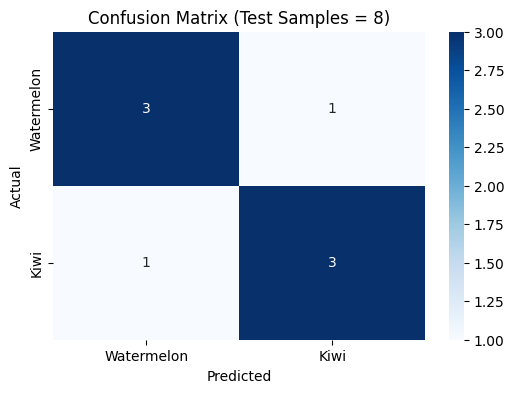


📊 Classification Report:
              precision    recall  f1-score   support

  Watermelon       0.75      0.75      0.75         4
        Kiwi       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8

📦 Total Images Used: 14
🧪 Test Samples: 8 (Expected 8)
🎯 Training Samples: 6
✅ Per-Class Distribution (Train):
  - Watermelon: 3
  - Kiwi: 3


In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import seaborn as sns

def extract_glcm_features(image, distances=[1], angles=[0], levels=256):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(gray, distances=distances, angles=angles, levels=levels, symmetric=True, normed=True)

    features = []
    props = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    for prop in props:
        val = graycoprops(glcm, prop)[0, 0]
        features.append(val)
    return features

def load_dataset(image_size=(256, 256)):
    data = []
    labels = []
    fruit_classes = ['watermelon', 'kiwi']

    for label, fruit in enumerate(fruit_classes):
        folder = f'fruit_dataset/{fruit}'
        file_list = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        for file in file_list:
            path = os.path.join(folder, file)
            img = cv2.imread(path)
            if img is None:
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            resized = cv2.resize(img_rgb, image_size)
            features = extract_glcm_features(resized)
            data.append(features)
            labels.append(label)

    return np.array(data), np.array(labels)

# Load and split dataset
X, y = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=8, random_state=42, stratify=y)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix (8×8 format expected for 8 test samples)
cm = confusion_matrix(y_test, y_pred)
print("\n🔍 Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Watermelon', 'Kiwi'], yticklabels=['Watermelon', 'Kiwi'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Samples = 8)')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Watermelon', 'Kiwi']))

# Summary Info
print(f"📦 Total Images Used: {len(X)}")
print(f"🧪 Test Samples: {len(y_test)} (Expected 8)")
print(f"🎯 Training Samples: {len(y_train)}")
print(f"✅ Per-Class Distribution (Train):")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  - {['Watermelon', 'Kiwi'][label]}: {count}")
